## Python静态网页元素选择

我们通过浏览器看到的网页是经过浏览器渲染的，服务器传输给我们的实际上是一串很长的、以HTML语言编写的字符串。通过使用Chrome的开发者工具，我们可以将浏览器渲染出来的元素与相应的HTML字符串对应起来。

### 课程目标

1. 掌握Chrome开发者工具的元素选择器用法
2. 使用bs4进行元素选取

### Chrome

访问```http://121.37.197.140:3389/example.html```网页，你会看到如下显示

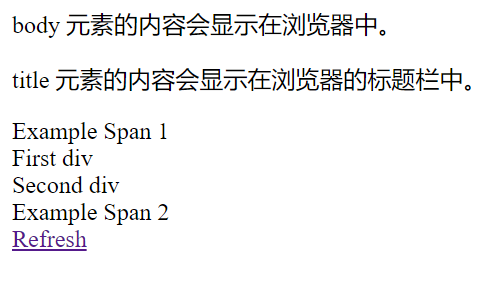

这时按下F12（如果没有反应，则按下 Fn + F12），右侧会弹出开发者工具。选择上方的```Elements```就可以看到当前网页对应的HTML代码。

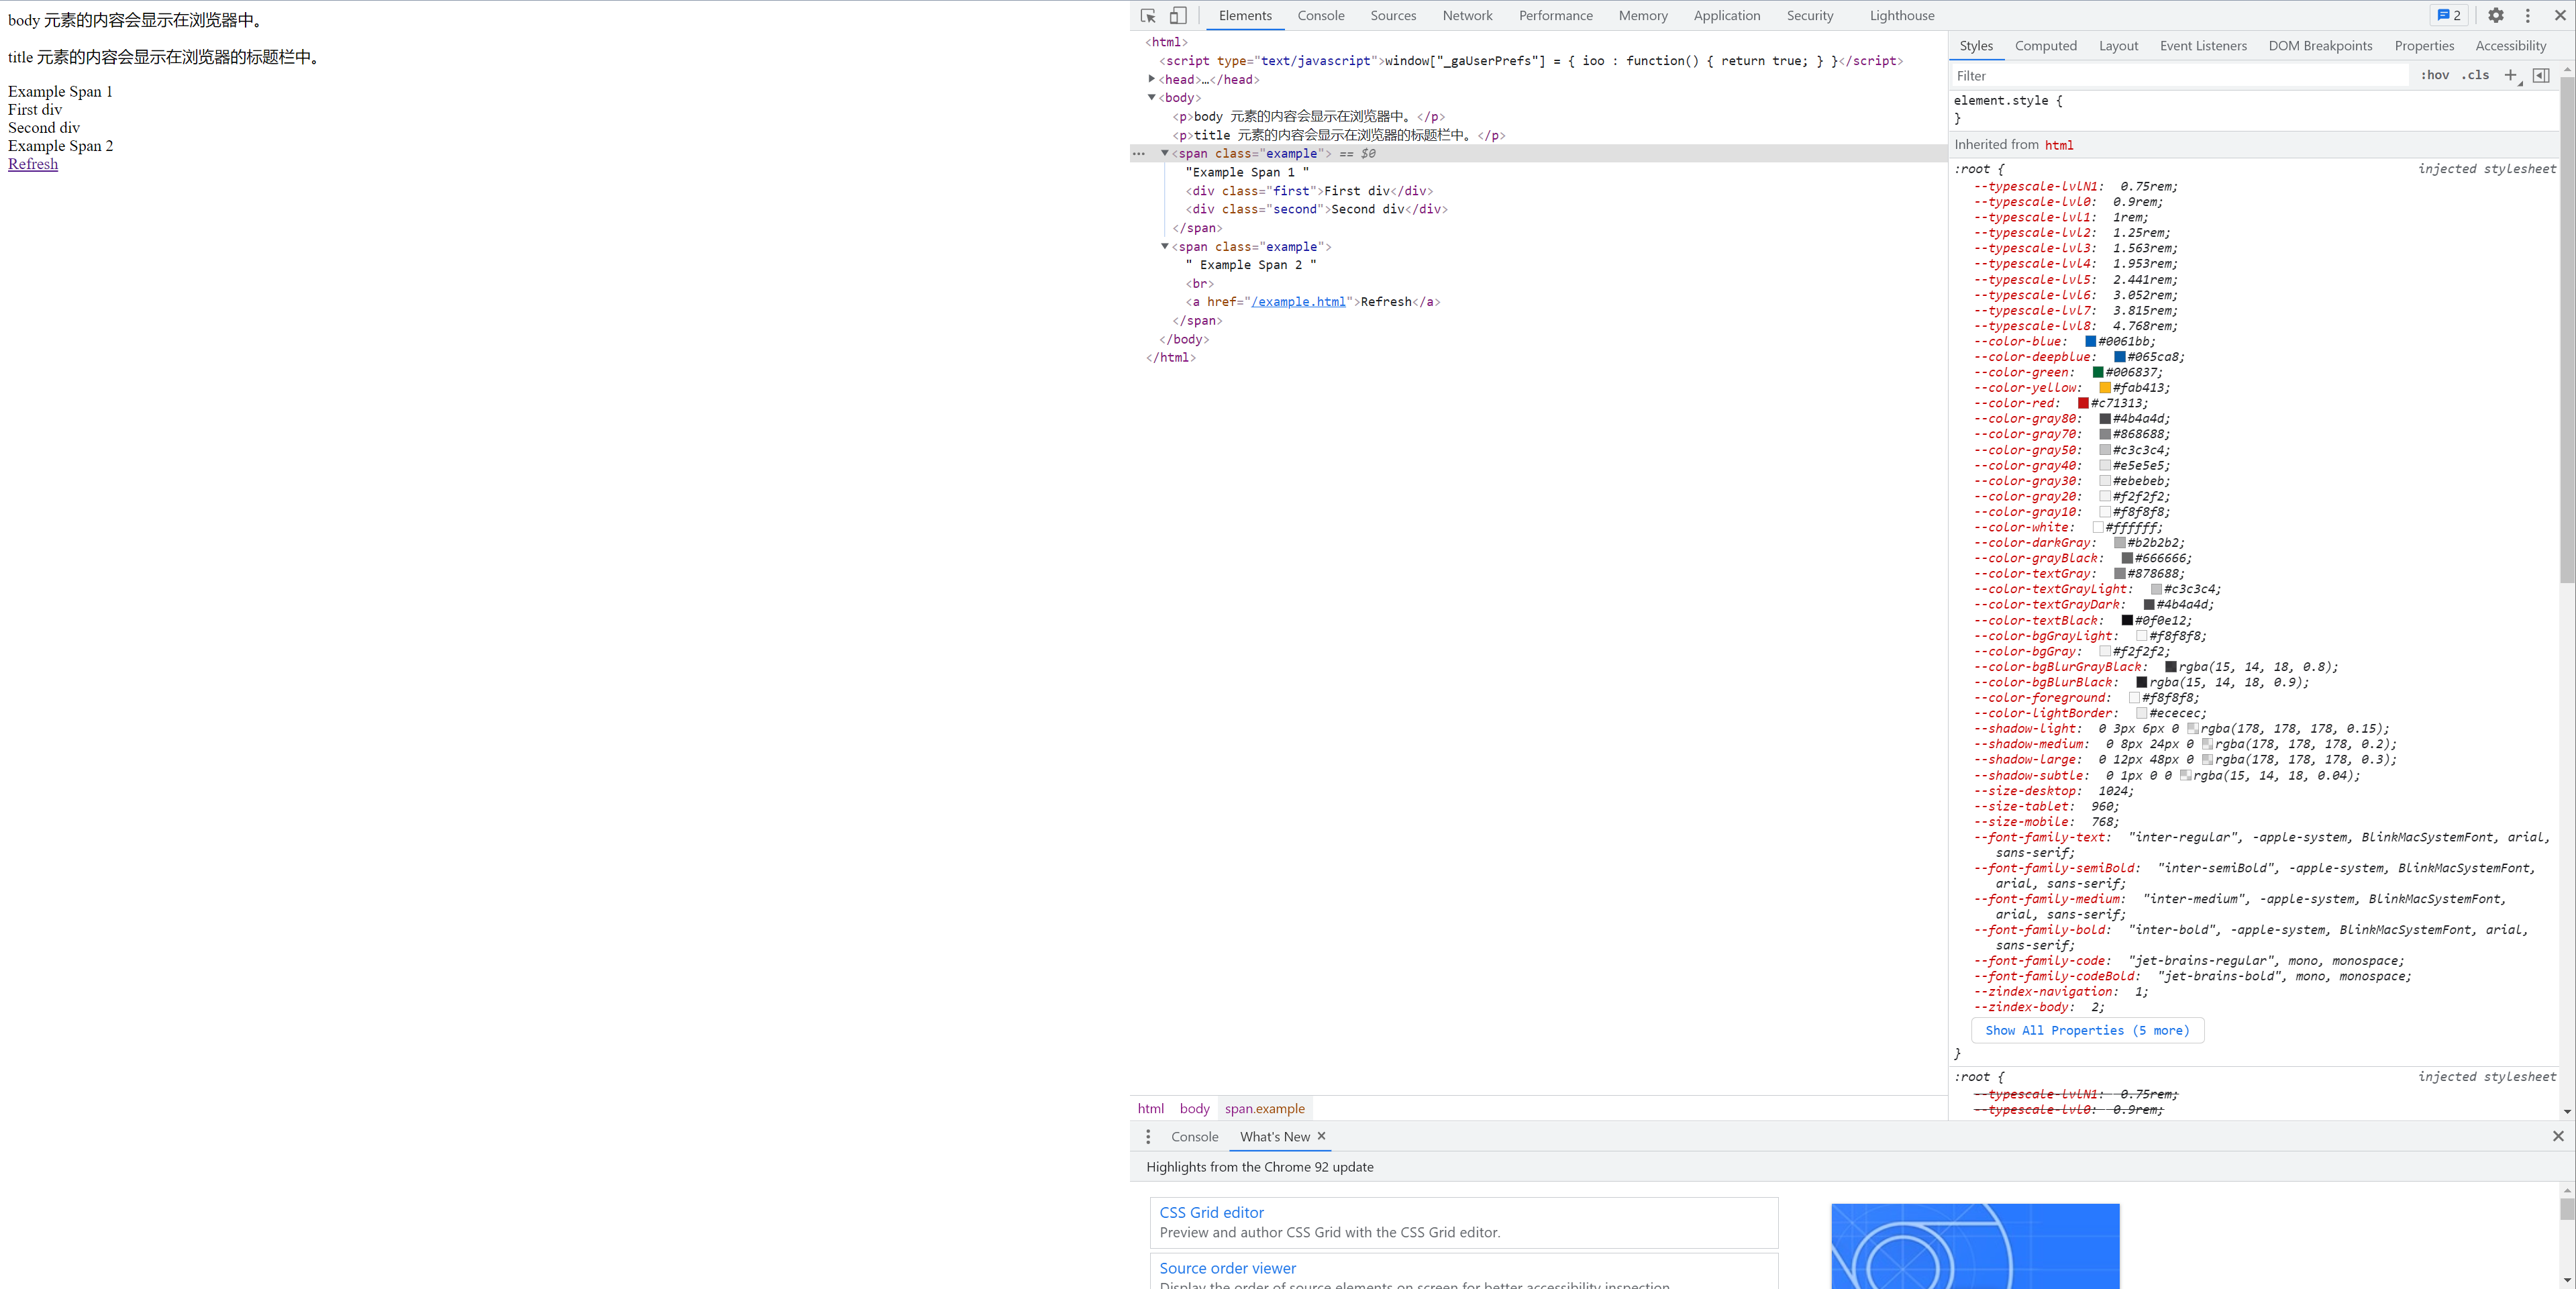

点击开发者工具左上角的元素选择器，然后选择左边相应的文字并单击，右侧机会出现改文字对应的HTML代码。

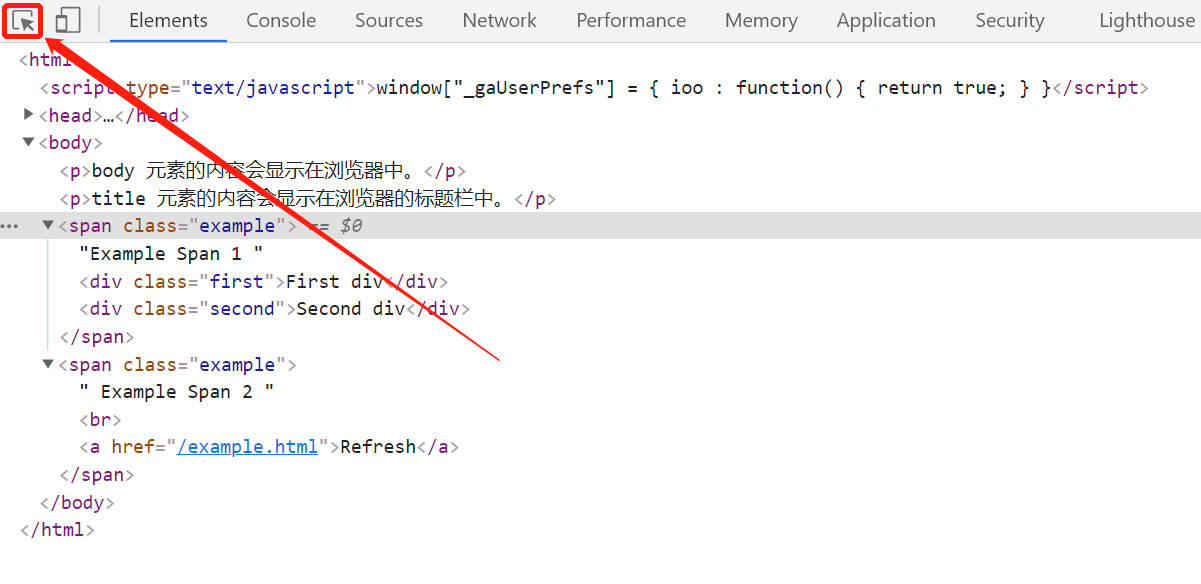

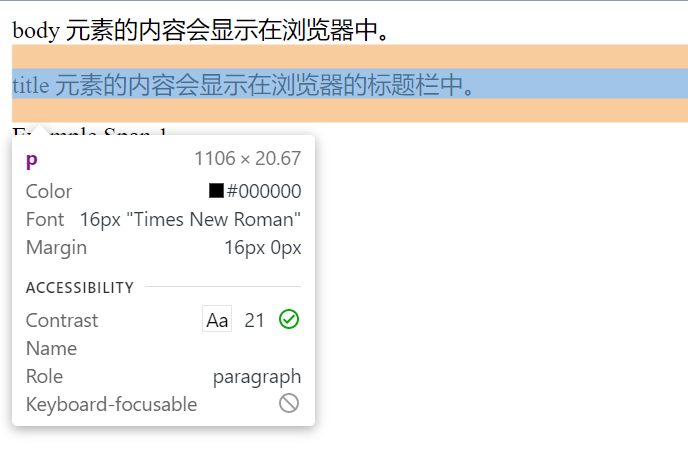

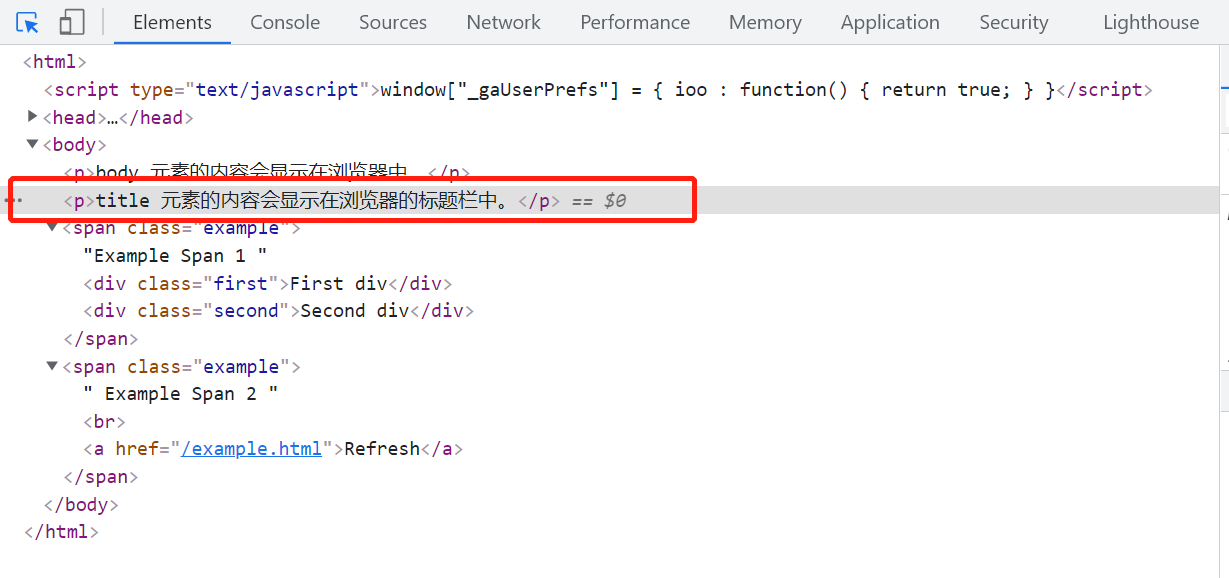

我们注意到，这段文字是被```<p>```和```</p>```包围起来的，它们是HTML标签，像括号一样一开一闭。包裹这段文字的**标签名**就是```p```。

注意“First div”是被```<div class="first">```和```</div>```包裹的。其中**标签名**是```div```，而```class```是它的**属性**。

### 练习

说明```Refresh```所在的标签名以及具有的属性。

### bs4

```bs4```是一个强大的库，提供了解析网页语言的```BeautifulSoup```类。

首先，我们使用```requests_html```将网页内容下载下来。

In [1]:
import requests_html

s = requests_html.HTMLSession()
response = s.get('http://121.37.197.140:3389/example.html')
html = response.text 
print(html)

<html>

<head>
<title>我的第一个 HTML 页面</title>
</head>

<body>
<p>body 元素的内容会显示在浏览器中。</p>
<p>title 元素的内容会显示在浏览器的标题栏中。</p>
<span class="example">Example Span 1
<div class="first">First div</div>
<div class="second">Second div</div>
</span>
<span class="example"> Example Span 2
<br>
<a href="/example.html">Refresh</a>
</span>
</body>

</html>



接着从```bs4```引入```BeautifulSoup```类，对该HTML进行解析。

In [6]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html)
print(soup)

<html>
<head>
<title>我的第一个 HTML 页面</title>
</head>
<body>
<p>body 元素的内容会显示在浏览器中。</p>
<p>title 元素的内容会显示在浏览器的标题栏中。</p>
<span class="example">Example Span 1
<div class="first">First div</div>
<div class="second">Second div</div>
</span>
<span class="example"> Example Span 2
<br/>
<a href="/example.html">Refresh</a>
</span>
</body>
</html>



可以看到，```BeautifulSoup```将原HTML进行了美化，如除去了无用的空格等。接下来我们通过```.find```方法来定位元素。

回顾我们之前的内容，First div是被div包裹起来的，而且有一个属性class的值是first。如果我们要定位它，就要告诉BeautifulSoup：我们要找的元素的标签名是div，有一个属性class值是first。

In [10]:
elem = soup.find(name='div',attrs={'class':'first'}) # name参数对应标签名，attrs参数对应属性
print(elem)

<div class="first">First div</div>


如果我们想要获得被HTML标签包裹其中的文字，可以访问```.text```属性。

In [11]:
print(elem.text)

First div


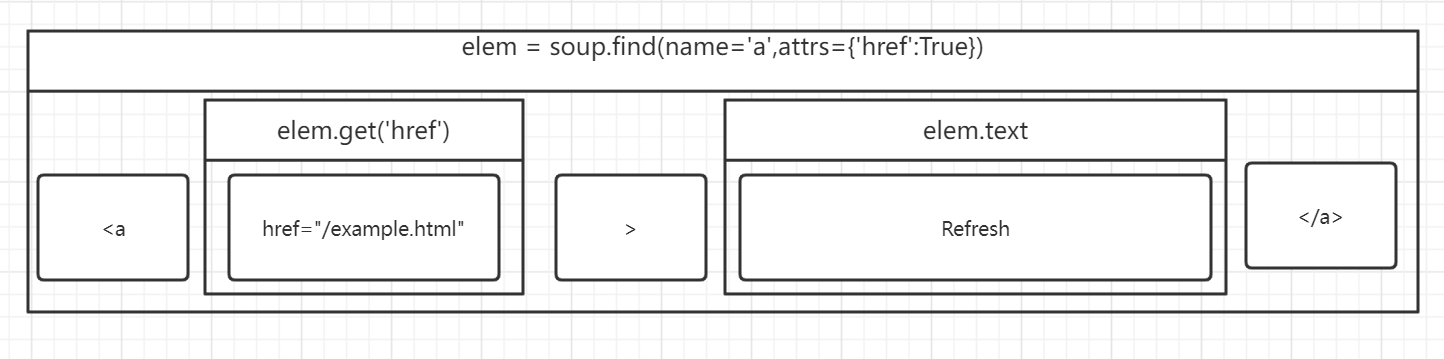
在该HTML页面中，Refresh是被a包裹起来的，他有一个属性href代表的是一个超链接。如果我们想获取这个超链接，需要先定位到该元素，然后再使用```.get```方法。

这里我们告诉BeautifulSoup，我们要找一个标签名为a的元素，而且它存在一个href属性。

In [14]:
elem = soup.find(name='a',attrs={'href':True})
print(elem)
print(elem.get('href'))

<a href="/example.html">Refresh</a>
/example.html


在一个HTML页面中，很可能有多个元素具有相同的标签名或属性。我们可以通过```.find_all```方法来获得所有符合条件元素的列表。

In [15]:
elem = soup.find_all(name='p')
print(elem)

[<p>body 元素的内容会显示在浏览器中。</p>, <p>title 元素的内容会显示在浏览器的标题栏中。</p>]


### 练习

获得`http://121.37.197.140:3389/example.html`网页中，所有标签名为div的元素，并把它们的class属性存到一个列表中。